<a href="https://www.kaggle.com/code/ayush3vedi/predictive-mean-score?scriptVersionId=188822522" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Project Title : 
**Predictive Mean Score of the students** 

# 1. Business Understanding:
   - Problem Statement: " The main problem we are addressing here is to predict the average score of the students using different types of Regression models. We are trying to solve which model gets the best result that is least error."


# 2. Data Understanding
   - Data Loading and Overview:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier 
from sklearn import linear_model
from sklearn.model_selection import train_test_split ,cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

Data Loading

In [2]:
df = pd.read_csv('/kaggle/input/predict-test-scores-of-students/test_scores.csv')

Showing first 5 rows 

In [3]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


- Data Size and Data Types:
     

In [4]:
df.shape

(2133, 11)

In [5]:
# DATA TYPES
df.dtypes

school              object
school_setting      object
school_type         object
classroom           object
teaching_method     object
n_student          float64
student_id          object
gender              object
lunch               object
pretest            float64
posttest           float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


   - **Summary Statistics**:
     


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
n_student,2133.0,22.796531,4.228893,14.0,20.0,22.0,27.0,31.0
pretest,2133.0,54.955931,13.563101,22.0,44.0,56.0,65.0,93.0
posttest,2133.0,67.102203,13.986789,32.0,56.0,68.0,77.0,100.0


In [8]:
# Here we are adding new column as "mean_score"

df["mean_score"]= ((df["pretest"]+ df["posttest"])/2).round() 

In [9]:
df["gender"].value_counts()

gender
Male      1077
Female    1056
Name: count, dtype: int64

In [10]:
df['school_setting'].value_counts()

school_setting
Urban       906
Suburban    717
Rural       510
Name: count, dtype: int64

In [11]:
df.nunique()

school               23
school_setting        3
school_type           2
classroom            97
teaching_method       2
n_student            18
student_id         2133
gender                2
lunch                 2
pretest              69
posttest             68
mean_score           66
dtype: int64

In [12]:
#set that unique column 'student_id' as an index for our dataset

df = df.set_index('student_id')
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest,posttest,mean_score
student_id,,,,,,,,,,,
2FHT3,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,62.0,72.0,67.0
3JIVH,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,66.0,79.0,72.0
3XOWE,ANKYI,Urban,Non-public,6OL,Standard,20.0,Male,Does not qualify,64.0,76.0,70.0
556O0,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,61.0,77.0,69.0
74LOE,ANKYI,Urban,Non-public,6OL,Standard,20.0,Male,Does not qualify,64.0,76.0,70.0


  **Correlation Analysis:**
*   To show correlation analysis, we have to convert whole catagorical data into numeric value.

In [13]:
cat_col = df.select_dtypes(exclude=['int','float'])

In [14]:
cat_col.copy()

,school,school_setting,school_type,classroom,teaching_method,gender,lunch
student_id,,,,,,,
2FHT3,ANKYI,Urban,Non-public,6OL,Standard,Female,Does not qualify
3JIVH,ANKYI,Urban,Non-public,6OL,Standard,Female,Does not qualify
3XOWE,ANKYI,Urban,Non-public,6OL,Standard,Male,Does not qualify
556O0,ANKYI,Urban,Non-public,6OL,Standard,Female,Does not qualify
74LOE,ANKYI,Urban,Non-public,6OL,Standard,Male,Does not qualify
...,...,...,...,...,...,...,...
T8LSK,ZOWMK,Urban,Public,ZBH,Standard,Female,Does not qualify
VNP26,ZOWMK,Urban,Public,ZBH,Standard,Female,Qualifies for reduced/free lunch
YDR1Z,ZOWMK,Urban,Public,ZBH,Standard,Female,Qualifies for reduced/free lunch


***FEATURE ENGINEERING TECHNIQUE***
* We will go through '**Label Encoding**' process to convert catagorical columns into numerical.

In [15]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_col.columns:
    cat_col[col] = le.fit_transform(cat_col[col])

In [16]:
num_col = df.select_dtypes(exclude ='object')
final_df = cat_col.join(num_col)
final_df

,school,school_setting,school_type,classroom,teaching_method,gender,lunch,n_student,pretest,posttest,mean_score
student_id,,,,,,,,,,,
2FHT3,0,2,0,22,1,0,0,20.0,62.0,72.0,67.0
3JIVH,0,2,0,22,1,0,0,20.0,66.0,79.0,72.0
3XOWE,0,2,0,22,1,1,0,20.0,64.0,76.0,70.0
556O0,0,2,0,22,1,0,0,20.0,61.0,77.0,69.0
74LOE,0,2,0,22,1,1,0,20.0,64.0,76.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...
T8LSK,22,2,1,94,1,0,0,30.0,39.0,55.0,47.0
VNP26,22,2,1,94,1,0,1,30.0,38.0,46.0,42.0
YDR1Z,22,2,1,94,1,0,1,30.0,45.0,51.0,48.0


**HEATMAP to visualize Correlation**

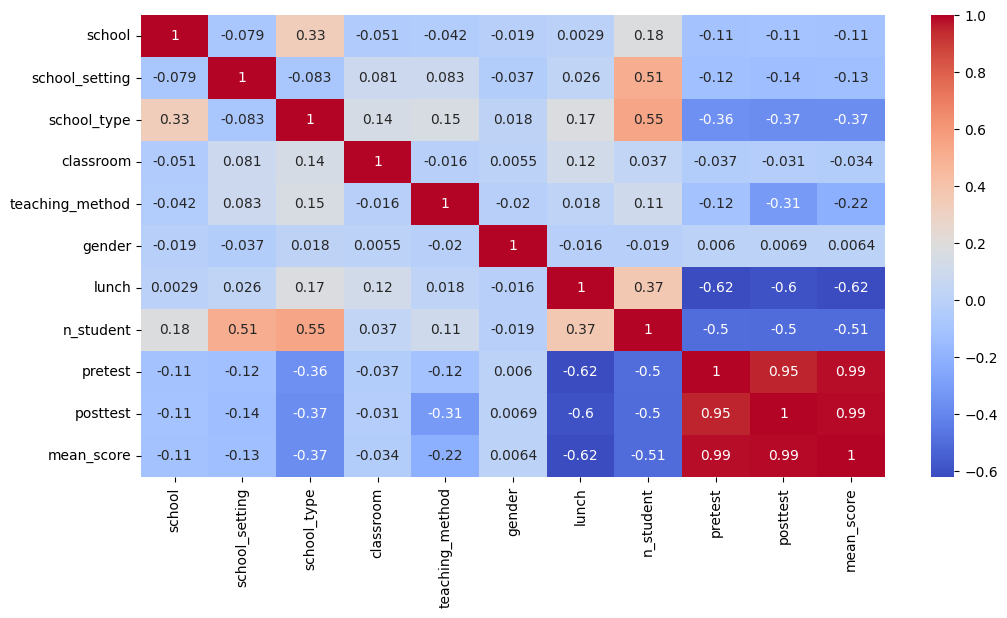

In [17]:
#Correlation and heatmap

plt.figure(figsize=(12,6))
sns.heatmap(final_df.corr(),annot = True, cmap='coolwarm')
plt.show()

# 2. Data Preparation:
   - Data Cleaning: 
   
   

In [18]:
#missing value status in the dataset
df.isnull().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
gender             0
lunch              0
pretest            0
posttest           0
mean_score         0
dtype: int64

So there are no any missing/null values.

# 3. Exploratory Data Analysis (EDA):
- Visualizations: Include relevant visualizations (e.g., histograms, scatter plots) to understand
the data.
- Outlier Detection: Identify and handle outliers, if present.

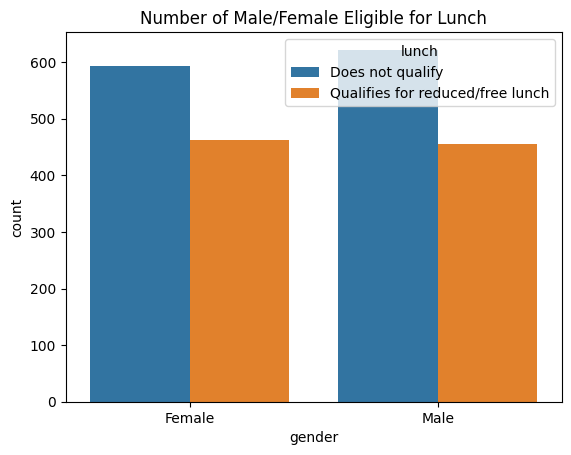

In [19]:
#countplot: Differentiating Gender counts on the basis of lunch

sns.countplot(x = df['gender'], hue = df['lunch'] )
plt.title("Number of Male/Female Eligible for Lunch")
plt.show()

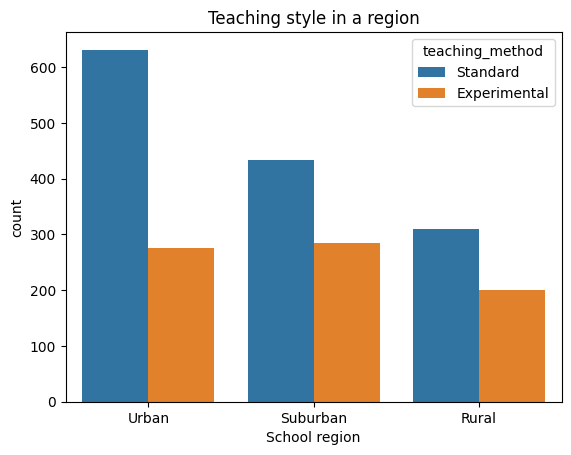

In [20]:
# Differentiate school_setting counts on the basis of teaching_method

sns.countplot(x = df['school_setting'],hue = df['teaching_method'])
plt.xlabel('School region')
plt.title("Teaching style in a region")
plt.show()

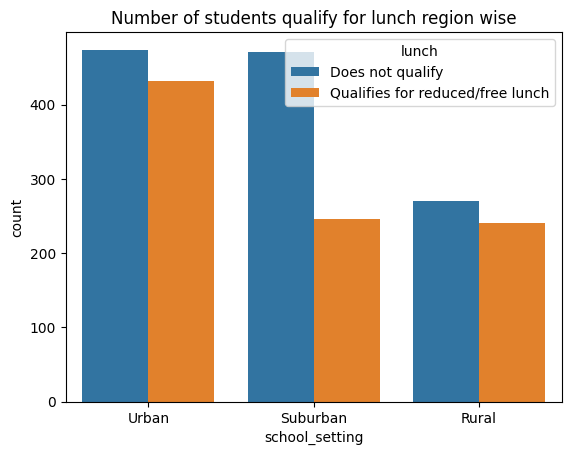

In [21]:
# how many Urban students who qualifies for free lunch ? (approx 430-40)

sns.countplot(data=df, x = 'school_setting', hue='lunch')
plt.title('Number of students qualify for lunch region wise')
plt.show()

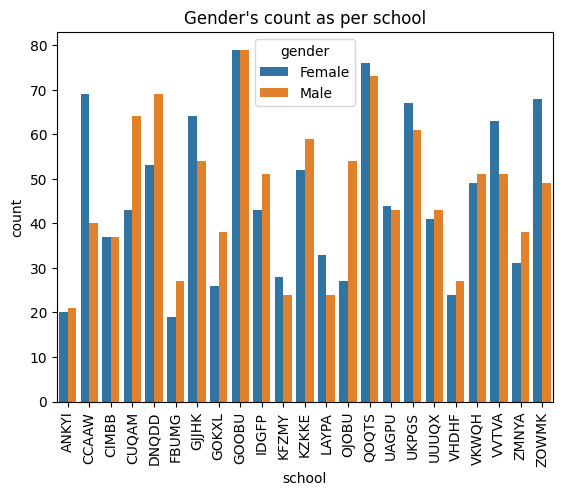

In [22]:
sns.countplot(x = 'school', data = df, hue = 'gender')
plt.title("Gender's count as per school")
plt.xticks(rotation=90)
plt.show()

**BAR PLOTS**

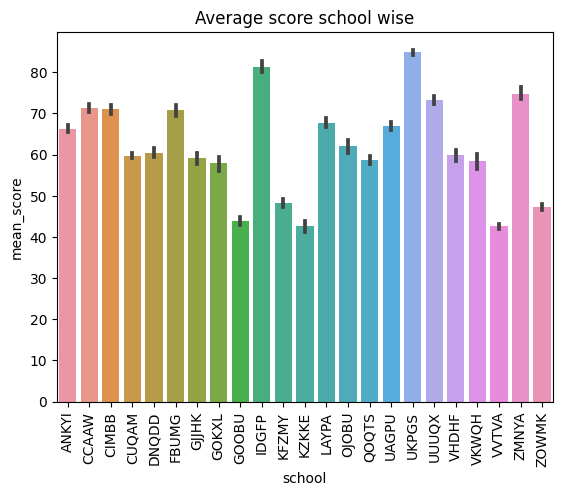

In [23]:
sns.barplot(x ='school',y = 'mean_score',data = df)
plt.title("Average score school wise")
plt.xticks(rotation=90)
plt.show()

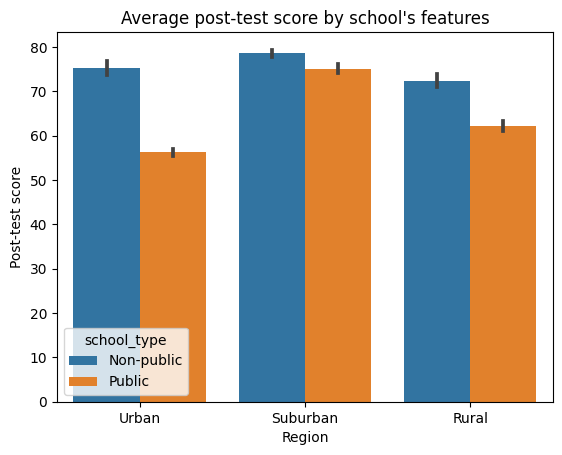

In [24]:
sns.barplot(data=df, x="school_setting", y="posttest",hue = "school_type")
plt.title("Average post-test score by school's features")
plt.xlabel("Region")
plt.ylabel("Post-test score")
plt.show()

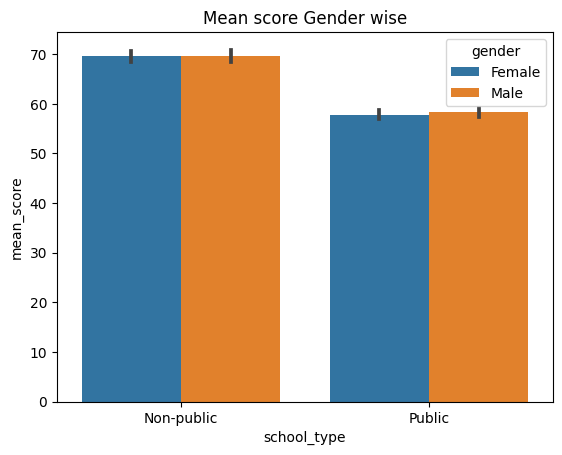

In [25]:
sns.barplot(data=df,x='school_type',y='mean_score',hue = 'gender')
plt.title('Mean score Gender wise')
plt.show()

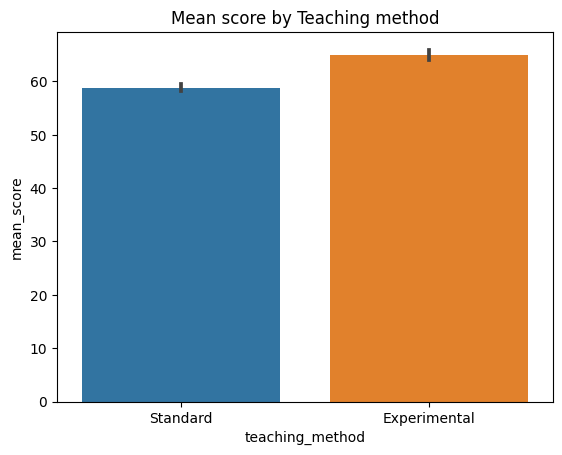

In [26]:
sns.barplot(data=df, x='teaching_method', y='mean_score')
plt.title('Mean score by Teaching method')
plt.show()

Above Bar graph is showing schools, which uses 'Experimental' teaching method gets better understanding and more average marks. 

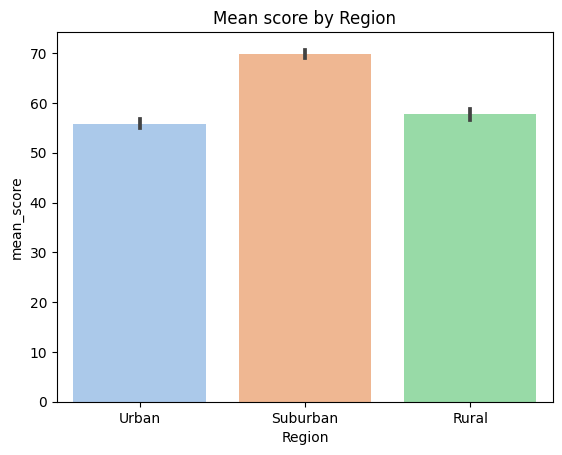

In [27]:
sns.barplot(data=df, x='school_setting',y='mean_score',color='c',palette='pastel')
plt.title('Mean score by Region')
plt.xlabel('Region')
plt.show()

Above Bar graph shows on the basis of school setting which schools gets good average score.

**HISTOGRAM**

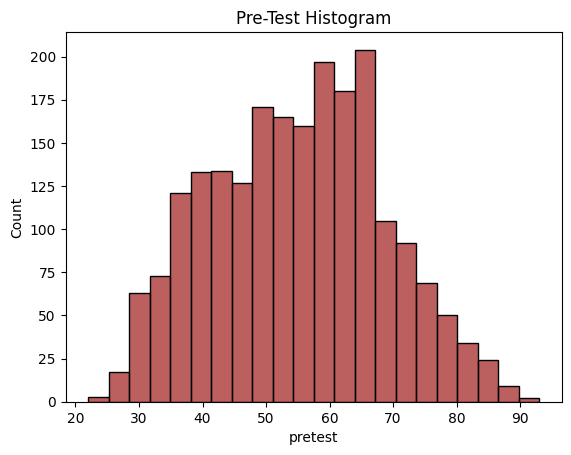

In [28]:
sns.histplot(df['pretest'],color ='brown')
plt.title('Pre-Test Histogram')
plt.show()

**SCATTER PLOTS**

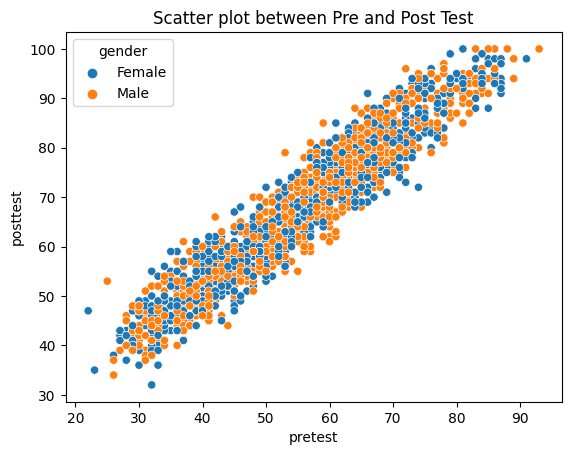

In [29]:
sns.scatterplot(x=df['pretest'], y=df['posttest'],hue=df['gender'])
plt.title('Scatter plot between Pre and Post Test')
plt.show()

Above scatter plot showing positive relation between pre-test and post-test.

In Python, **fig, ax = plt.subplots( )** is a common way to create a figure and one or more axes using the matplotlib library.

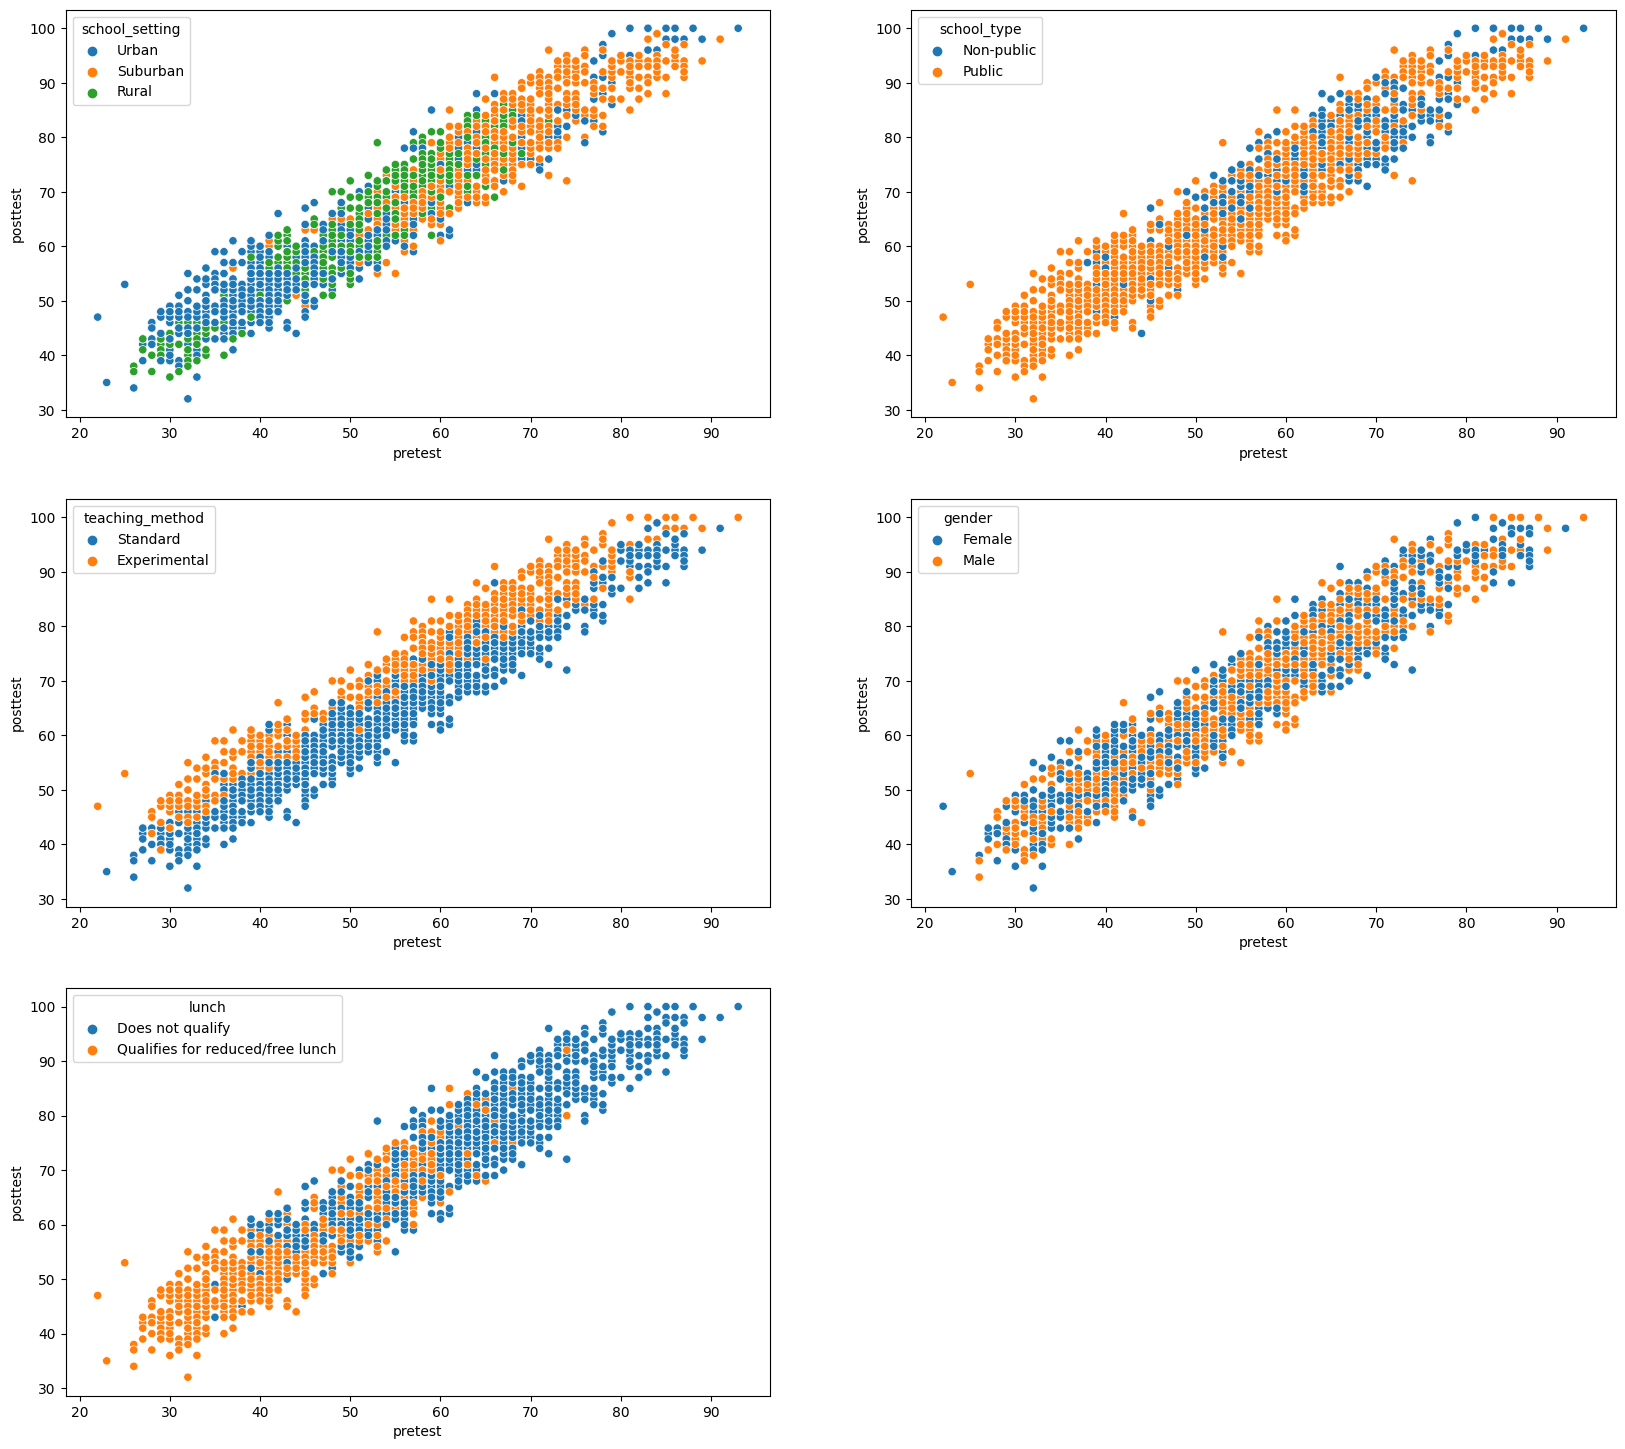

In [30]:
# Multiple Scatter plot using subplots function

categorial_var = ['school', 'school_setting', 'school_type', 'teaching_method', 'gender', 'lunch']

fig, ax = plt.subplots(figsize=(20,18), nrows=3, ncols=2)

for c, axis in zip(categorial_var[1:], ax.ravel()):
    sns.scatterplot(data=df,x="pretest", y="posttest",hue=c,ax=axis)
    
ax[2][1].set_visible(False)

**BOX PLOTs**

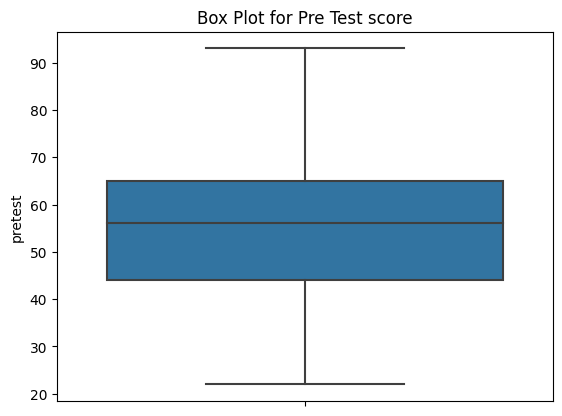

In [31]:
sns.boxplot(y=df['pretest'])
plt.title('Box Plot for Pre Test score')
plt.show()

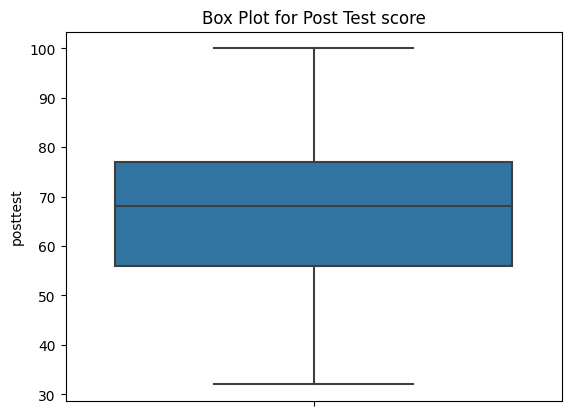

In [32]:
sns.boxplot(y=df['posttest'])
plt.title('Box Plot for Post Test score')
plt.show()

**REGRESSION PLOT**

# 4. Feature Importance

Here we can see the **Pre-test** and **Post-test** both features having major role in this project, so we made 'mean score' using combining that both features. So We took 'mean score' as a target features.

# 5. Prepare Model Building


Here the dependent i.e. **Target variable is 'mean_score'**
and the independent variables i.e. **features are 'whole columns'** excluded mean score.

In [33]:
# Features
x = final_df.iloc[:,1:8]

# Target or Dependent variable
y = final_df['mean_score']

**Train-Test Split**:
     - Split the dataset into training and test sets for model evaluation.


In [34]:
x_train, x_test, y_train ,y_test = train_test_split(x, y, test_size= 0.20, random_state =12)


In [35]:
x_train

,school_setting,school_type,classroom,teaching_method,gender,lunch,n_student
student_id,,,,,,,
9JGL2,2,0,59,0,0,0,17.0
07R5Z,0,0,52,0,1,0,14.0
0QJP2,2,1,76,1,0,1,25.0
BN7PS,1,1,7,0,0,0,24.0
J46NP,2,1,15,1,0,0,24.0
...,...,...,...,...,...,...,...
PU6GL,1,1,16,1,0,0,22.0
WUC3P,2,1,15,1,0,0,24.0
GDMQS,1,1,20,1,0,0,23.0


In [36]:
y_train

student_id
9JGL2    92.0
07R5Z    68.0
0QJP2    44.0
BN7PS    76.0
J46NP    59.0
         ... 
PU6GL    72.0
WUC3P    52.0
GDMQS    71.0
HA8N7    63.0
4YT5N    36.0
Name: mean_score, Length: 1706, dtype: float64

In [37]:
x_test

,school_setting,school_type,classroom,teaching_method,gender,lunch,n_student
student_id,,,,,,,
889HH,1,1,71,0,1,1,28.0
E6Q1J,1,1,89,1,0,0,27.0
18OHA,0,1,36,0,0,0,19.0
JOWGS,2,1,83,0,0,1,26.0
7R2Y4,2,1,5,1,1,0,28.0
...,...,...,...,...,...,...,...
C6U78,1,1,72,1,0,0,21.0
0G8PS,2,1,76,1,0,1,25.0
ULA1C,2,1,61,1,0,1,24.0


In [38]:
y_test

student_id
889HH    62.0
E6Q1J    66.0
18OHA    68.0
JOWGS    45.0
7R2Y4    60.0
         ... 
C6U78    73.0
0G8PS    46.0
ULA1C    44.0
78IT6    32.0
G1D76    39.0
Name: mean_score, Length: 427, dtype: float64

In [39]:
x_train.shape, y_train.shape, x_test.shape

((1706, 7), (1706,), (427, 7))

# Cross Validation 

In [40]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

model = DecisionTreeRegressor()
kfold_validation = KFold(10)

results = cross_val_score(model,x_train,y_train,cv = kfold_validation)
print(results)
print(np.mean(results))

[0.96017823 0.95555749 0.92644623 0.8868751  0.95684422 0.96418248
 0.95045197 0.95057179 0.9460506  0.93252308]
0.9429681180928494


# 6.Model Building

- **Machine Learning Task:**
Here we will perform different type of **'Regression'** models.

**1) LINEAR REGRESSION**

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score

LR_model = LinearRegression()
LR_model.fit(x_train,y_train)

y_pred_LR = LR_model.predict(x_test)

mse_LR = mean_squared_error(y_test,y_pred_LR)

print(mse_LR)

81.00126170471057


**2) RANDOM FOREST REGRESSION**

In [42]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(random_state=4)
RF_model.fit(x_train,y_train)

y_pred_RF = RF_model.predict(x_test)

mse_RF = mean_squared_error(y_test,y_pred_RF)
print(mse_RF)

7.783961266665222


**3) DECISION TREE REGRESSION**

In [43]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor()
DT_model.fit(x_train,y_train)

y_pred_DT = DT_model.predict(x_test)

mse_DT = mean_squared_error(y_test,y_pred_DT)
print(mse_DT)

7.793561312874759


**4) RIDGE REGRESSION**

In [44]:
from sklearn.linear_model import Lasso, Ridge

LS_model = Lasso(random_state = 4,selection='random', tol=1e-3)
LS_model.fit(x_train,y_train)

y_pred_LS = LS_model.predict(x_test)

mse_LS = mean_squared_error(y_test,y_pred_LS)
print(mse_LS)

97.13017759618482


**5) RIDGE REGRESSION**

In [45]:
Rd_model = Ridge(random_state = 4, tol=1e-3)
Rd_model.fit(x_train,y_train)

y_pred_Rd = Rd_model.predict(x_test)

mse_Rd = mean_squared_error(y_test,y_pred_Rd)
print(mse_Rd)

81.017204450963


**'Mean Squared Error' of all regression models**

In [46]:
comparison_reg_mse = [mse_LR,mse_RF,mse_DT,mse_LS,mse_Rd]
columns = ['mse_LR','mse_RF','mse_DT','mse_LS','mse_Rd']
df_mse = pd.DataFrame(comparison_reg_mse,columns)
print(df_mse)

                0
mse_LR  81.001262
mse_RF   7.783961
mse_DT   7.793561
mse_LS  97.130178
mse_Rd  81.017204


So here above regression errors shows that the 'Decision Tree regressor' has **less** mean squared error compare to all others. 

**'R-SQUARED' score of all regression models**

In [47]:
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score

r2_LR = r2_score(y_test,y_pred_LR)
r2_RF = r2_score(y_test,y_pred_RF)
r2_DT = r2_score(y_test,y_pred_DT)
r2_LS = r2_score(y_test,y_pred_LS)
r2_Rd = r2_score(y_test,y_pred_Rd)


#  Comparison of regression models on the basis of 'R squared'
comparison_reg_r2 = [r2_LR,r2_RF,r2_DT,r2_LS,r2_Rd]
column_r2 = ['r2_LR','r2_RF','r2_DT','r2_LS','r2_Rd']
df_r2 = pd.DataFrame(comparison_reg_r2,column_r2)
print(df_r2)

              0
r2_LR  0.562849
r2_RF  0.957991
r2_DT  0.957939
r2_LS  0.475804
r2_Rd  0.562763


From above R-squared score we see that **95.8 %** of variance explained by the model "Decision Tree Regressor". 

**'MEAN ABSOLUTE ERROR' of all regression model**

In [48]:
mae_LR = mean_absolute_error(y_test, y_pred_LR)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
mae_DT = mean_absolute_error(y_test, y_pred_DT)
mae_LS = mean_absolute_error(y_test, y_pred_LS)
mae_Rd = mean_absolute_error(y_test, y_pred_Rd)



#  Comparison of regression models on the basis of Mean Absolute Error
comparison_reg_mae = [mae_LR,mae_RF,mae_DT,mae_LS,mae_Rd]
column_mae = ['mae_LR','mae_RF','mae_DT','mae_LS','mae_Rd']
df_mae = pd.DataFrame(comparison_reg_mae,column_mae)
print(df_mae)

               0
mae_LR  7.233929
mae_RF  2.233064
mae_DT  2.227728
mae_LS  7.935376
mae_Rd  7.235236


As we know "Lower the MAE, the model is good". So here from the above values, we can see that 'Decision Tree Regressor' has the lowest mean absolute error.  

**'Root Mean Square Error' of all regression models**

In [49]:
# Calculate Root Mean square error (rmse)
rmse_LR = math.sqrt(mse_LR)
rmse_RF = math.sqrt(mse_RF)
rmse_DT = math.sqrt(mse_DT)
rmse_LS = math.sqrt(mse_LS)
rmse_Rd = math.sqrt(mse_Rd)

#  Comparison of regression models on the basis of 'Root Mean squared Error'
comparison_reg_rmse = [rmse_LR,rmse_RF,rmse_DT,rmse_LS,rmse_Rd]
column_rmse = ['rmse_LR','rmse_RF','rmse_DT','rmse_LS','rmse_Rd']
df_rmse = pd.DataFrame(comparison_reg_rmse,column_rmse)
print(df_rmse)

                0
rmse_LR  9.000070
rmse_RF  2.789975
rmse_DT  2.791695
rmse_LS  9.855464
rmse_Rd  9.000956


# CONCLUSION

By exploring all the above tasks, we conclude that '**Decison Tree Regressor**' is the **best** model to predict the 'mean score'of the students. Also Pretest and Posttest score both features have crucial role in this datasets.